<a href="https://colab.research.google.com/github/KushalSethia30/MarketingResearchMethods-Kushal-Sethia-Jio-Institute/blob/main/500_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas nltk textblob nrclex

INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nrclex: filename=NRCLex-3.0.0-py3-none-any.whl size=43308 sha256=e946aceadeb09396f95d3c8c9bcdf49ec431ca7072fbe5ff917f4e458d5af7e7
  Stored in directory: /root/.cache/pip/wheels/ed/ac/fa/7afddefd14f51c4a963ed291b9052746ed3929473e5a33118d
Successfully built nrclex


In [ ]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from nrclex import NRCLex

# Ensure nltk has the necessary data
nltk.download('vader_lexicon')

# Load the dataset
file_path = "/content/Reviews 500.csv"  # Change to your actual file path
df = pd.read_csv(file_path)

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to analyze sentiment
def analyze_sentiment(text):
    sentiment_scores = sia.polarity_scores(text)
    polarity = TextBlob(text).sentiment.polarity
    return sentiment_scores['compound'], polarity

# Function to categorize emotions into five types
def categorize_emotion(text):
    emotion = NRCLex(text)
    emotion_scores = emotion.raw_emotion_scores

    # Map emotions into five primary categories
    emotion_mapping = {
        "joy": ["joy", "trust", "anticipation"],
        "sadness": ["sadness"],
        "anger": ["anger", "disgust"],
        "fear": ["fear"],
        "surprise": ["surprise"]
    }

    # Assign highest matching emotion category
    max_emotion = "Neutral"
    max_score = 0
    for category, emotions in emotion_mapping.items():
        score = sum(emotion_scores.get(e, 0) for e in emotions)
        if score > max_score:
            max_emotion = category
            max_score = score

    return max_emotion

# Apply sentiment and emotion analysis
df['Sentiment_Score'], df['Polarity'] = zip(*df['Text'].astype(str).apply(analyze_sentiment))
df['Emotion_Category'] = df['Text'].astype(str).apply(categorize_emotion)

# Save the results to a new CSV file
df.to_csv("sentiment_emotion_analysis_5types.csv", index=False)

# Display the first few rows
import ace_tools as tools
tools.display_dataframe_to_user(name="Sentiment and Emotion Analysis (5 Types)", dataframe=df)


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
<ipython-input-4-d54247f450b4>:12: DtypeWarning: Columns (1,2,3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)



**********************************************************************
  Resource punkt_tab not found.
  Please use the NLTK Downloader to obtain the resource:

  >>> import nltk
  >>> nltk.download('punkt_tab')
  
  For more information see: https://www.nltk.org/data.html

  Attempted to load tokenizers/punkt_tab/english/

  Searched in:
    - '/root/nltk_data'
    - '/usr/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************



MissingCorpusError: 
Looks like you are missing some required data for this feature.

To download the necessary data, simply run

    python -m textblob.download_corpora

or use the NLTK downloader to download the missing data: http://nltk.org/data.html
If this doesn't fix the problem, file an issue at https://github.com/sloria/TextBlob/issues.


In [ ]:
!pip install pandas matplotlib prophet --quiet

import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet

# Load dataset
file_path = "/mnt/data/your_file.csv"  # Replace with your actual file path
df = pd.read_csv(file_path)

# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Aggregate sales by date
df_sales = df.groupby('Order Date').agg({'Sales': 'sum'}).reset_index()

# Rename columns for Prophet
df_sales = df_sales.rename(columns={'Order Date': 'ds', 'Sales': 'y'})

# Initialize Prophet model
model = Prophet(yearly_seasonality=True, weekly_seasonality=True, daily_seasonality=False)
model.add_seasonality(name='monthly', period=30.5, fourier_order=5)  # Custom monthly seasonality

# Fit model
model.fit(df_sales)

# Create future dataframe for predictions (next 365 days)
future = model.make_future_dataframe(periods=365)

# Forecast
forecast = model.predict(future)

# Plot forecast
fig = model.plot(forecast)
plt.title("Sales Forecast using Prophet")
plt.show()

# Plot seasonality components
fig2 = model.plot_components(forecast)
plt.show()

# Save forecast results
forecast_output_file = "/mnt/data/prophet_sales_forecast.csv"
forecast.to_csv(forecast_output_file, index=False)

# Provide the file for download
forecast_output_file


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/your_file.csv'

In [ ]:
!pip install pandas nltk textblob nrclex

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from nrclex import NRCLex

# Download necessary NLTK data
nltk.download('vader_lexicon')  # For VADER sentiment analysis
nltk.download('punkt')  # For sentence tokenization with TextBlob
nltk.download('punkt_tab') # For sentence tokenization with NRCLex
nltk.download('averaged_perceptron_tagger')  # For word tokenization and POS tagging

# Load the dataset
file_path = "/content/Reviews 500.csv"  # Change to your actual file path
df = pd.read_csv(file_path)

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to analyze sentiment
def analyze_sentiment(text):
    sentiment_scores = sia.polarity_scores(text)
    polarity = TextBlob(text).sentiment.polarity
    return sentiment_scores['compound'], polarity

# Function to categorize emotions into five types
def categorize_emotion(text):
    emotion = NRCLex(text)
    emotion_scores = emotion.raw_emotion_scores

    # Map emotions into five primary categories
    emotion_mapping = {
        "joy": ["joy", "trust", "anticipation"],
        "sadness": ["sadness"],
        "anger": ["anger", "disgust"],
        "fear": ["fear"],
        "surprise": ["surprise"]
    }

    # Assign highest matching emotion category
    max_emotion = "Neutral"
    max_score = 0
    for category, emotions in emotion_mapping.items():
        score = sum(emotion_scores.get(e, 0) for e in emotions)
        if score > max_score:
            max_emotion = category
            max_score = score

    return max_emotion

# Apply sentiment and emotion analysis
df['Sentiment_Score'], df['Polarity'] = zip(*df['Text'].astype(str).apply(analyze_sentiment))
df['Emotion_Category'] = df['Text'].astype(str).apply(categorize_emotion)

# Save the results to a new CSV file
df.to_csv("sentiment_emotion_analysis_5types.csv", index=False)

# Display the first few rows
import ace_tools as tools
tools.display_dataframe_to_user(name="Sentiment and Emotion Analysis (5 Types)", dataframe=df)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
<ipython-input-9-5bc24e4518fa>:15: DtypeWarning: Columns (1,2,3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


ModuleNotFoundError: No module named 'ace_tools'

In [ ]:
import pandas as pd
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from nrclex import NRCLex

# Download necessary NLTK data
nltk.download('vader_lexicon')  # For VADER sentiment analysis
nltk.download('punkt')  # For sentence tokenization with TextBlob
nltk.download('punkt_tab') # For sentence tokenization with NRCLex
nltk.download('averaged_perceptron_tagger')  # For word tokenization and POS tagging

# Load the dataset
file_path = "/content/Reviews 500.csv"  # Change to your actual file path
df = pd.read_csv(file_path)

# Initialize VADER Sentiment Analyzer
sia = SentimentIntensityAnalyzer()

# Function to analyze sentiment
def analyze_sentiment(text):
    sentiment_scores = sia.polarity_scores(text)
    polarity = TextBlob(text).sentiment.polarity
    return sentiment_scores['compound'], polarity

# Function to categorize emotions into five types
def categorize_emotion(text):
    emotion = NRCLex(text)
    emotion_scores = emotion.raw_emotion_scores

    # Map emotions into five primary categories
    emotion_mapping = {
        "joy": ["joy", "trust", "anticipation"],
        "sadness": ["sadness"],
        "anger": ["anger", "disgust"],
        "fear": ["fear"],
        "surprise": ["surprise"]
    }

    # Assign highest matching emotion category
    max_emotion = "Neutral"
    max_score = 0
    for category, emotions in emotion_mapping.items():
        score = sum(emotion_scores.get(e, 0) for e in emotions)
        if score > max_score:
            max_emotion = category
            max_score = score

    return max_emotion

# Apply sentiment and emotion analysis
df['Sentiment_Score'], df['Polarity'] = zip(*df['Text'].astype(str).apply(analyze_sentiment))
df['Emotion_Category'] = df['Text'].astype(str).apply(categorize_emotion)

# Save the results to a new CSV file
df.to_csv("sentiment_emotion_analysis_5types.csv", index=False)

# Display the first few rows using pandas head() method
# This replaces the ace_tools function which is not available
print("Sentiment and Emotion Analysis (639 Types)")
display(df.head())  # Displays the first 639 rows by default

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
<ipython-input-11-0904a8f21e78>:15: DtypeWarning: Columns (1,2,3,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Sentiment and Emotion Analysis (639 Types)


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Text,Sentiment_Score,Polarity,Emotion_Category
0,1.0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1.0,1.0,5.0,1.303862e+09,I have bought several of the Vitality canned d...,0.9441,0.450000,joy
1,2.0,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0.0,0.0,1.0,1.346976e+09,Product arrived labeled as Jumbo Salted Peanut...,-0.5664,-0.033333,joy
2,3.0,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1.0,1.0,4.0,1.219018e+09,This is a confection that has been around a fe...,0.8265,0.133571,joy
3,4.0,B000UA0QIQ,A395BORC6FGVXV,Karl,3.0,3.0,2.0,1.307923e+09,If you are looking for the secret ingredient i...,0.0000,0.166667,joy
4,5.0,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0.0,0.0,5.0,1.350778e+09,Great taffy at a great price. There was a wid...,0.9468,0.483333,joy


In [ ]:
# prompt: give csv file to download for above output

from google.colab import files
files.download('sentiment_emotion_analysis_5types.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

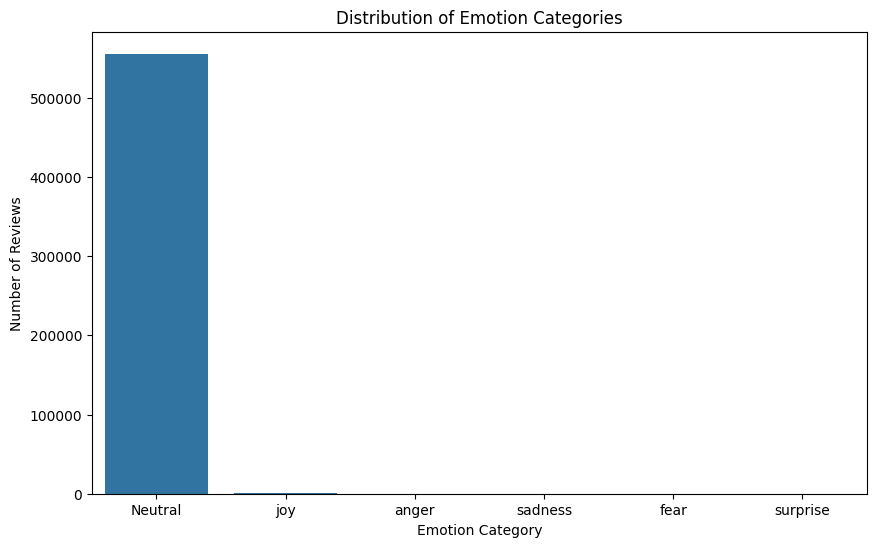

In [ ]:
# prompt: do barchart according to emotion

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataframe (assuming it's already created and named 'df')
# ... your existing code to load and process the dataframe ...

# Count the occurrences of each emotion category
emotion_counts = df['Emotion_Category'].value_counts()

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=emotion_counts.index, y=emotion_counts.values)
plt.title('Distribution of Emotion Categories')
plt.xlabel('Emotion Category')
plt.ylabel('Number of Reviews')
plt.show()
